In [26]:
import pandas as pd 
import numpy as np
import geopandas
%matplotlib inline 
import matplotlib.pyplot as plt 

In [27]:
facilities = pd.read_csv("Data.csv")

In [28]:
num_facilities = facilities.groupby("neighborhood").size()

In [29]:
num_facilities.head

<bound method NDFrame.head of neighborhood
Allegheny Center       4
Allegheny West         3
Allentown              3
Banksville             7
Bedford Dwellings      6
                      ..
Upper Lawrenceville    1
West End               2
West Oakland           1
Westwood               4
Windgap                3
Length: 75, dtype: int64>

In [30]:
num_facilities.sort_values(ascending=False)

neighborhood
Highland Park           30
Squirrel Hill South     29
Perry North             20
Brookline               19
Strip District          15
                        ..
Bon Air                  1
California-Kirkbride     1
East Allegheny           1
Central Northside        1
Crafton Heights          1
Length: 75, dtype: int64

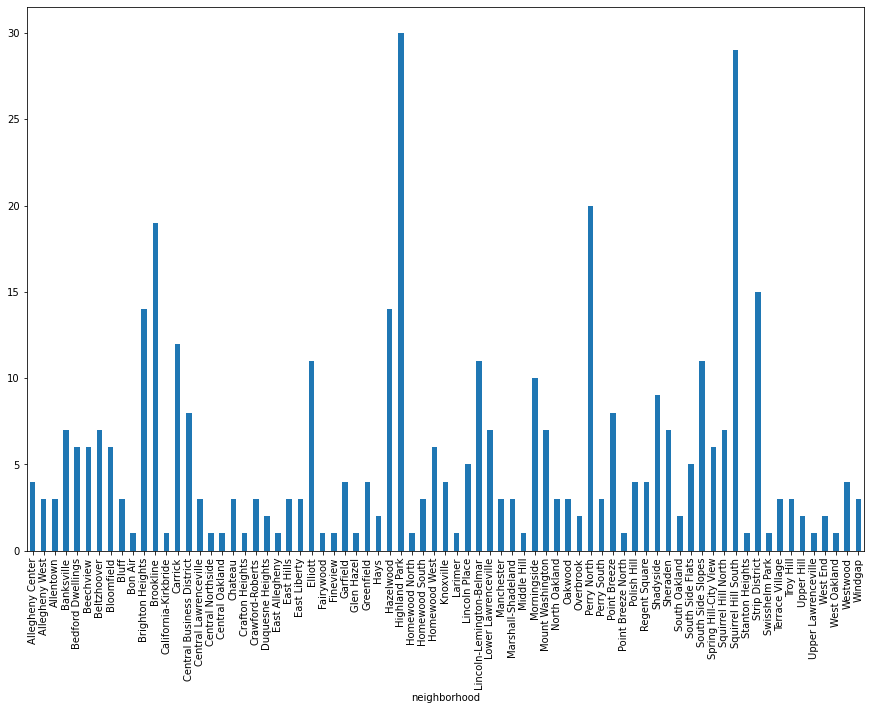

In [31]:
num_facilities.plot.bar(figsize=(15, 10))

,hood,facilities,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,3.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,15.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


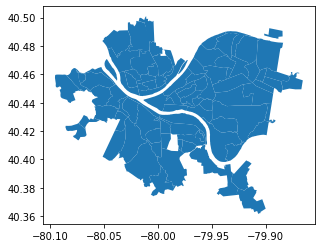

In [32]:
neighborhoods = geopandas.read_file("NeighborFiles/Neighborhoods_.shp") 
neighborhoods.plot()
facilities_map = neighborhoods.merge(num_facilities.rename("facilities"), how='left', left_on='hood', right_on='neighborhood')
facilities_map[['hood','facilities','geometry']].head()

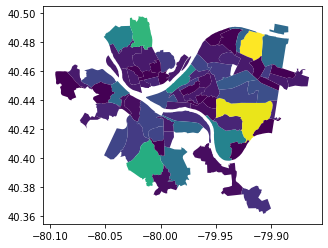

In [37]:
facilities_map.plot(column='facilities')

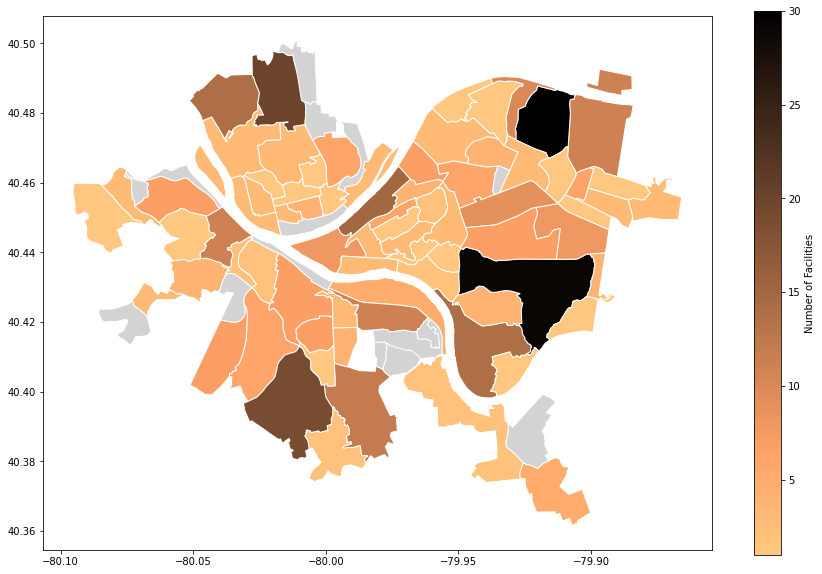

In [40]:
facilities_map.plot(column='facilities', # set the data to be used for coloring
               cmap='copper_r',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Facilities"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Analysis: 
I started by pulling the data into this file.  Then, I organized the data by neighborhood.  I then created a bar graph to get a clear visual of my data.  I merged the data from the data.csv file with the neighborhoods file, in order to create  the maps using geopandas to have more visuals to showcase what was the highest.  My highest one was Highland Park and that it had the most facitlities for people to use.  However, I think something that the data doesn't take into account is the population of each of the neighborhoods.  If a neighborhood has a higher population, there may be more facilities.  I think if the population was included I would've organized based on pupulation and by the neighborhood.  
    